In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
# read data
data = pd.read_csv("mbd_updated.csv").iloc[:, :-3]

# get sd and kurt
sd = data['sd']
kurt = data['kurt']

In [113]:
# calculate rolling mean
def rolling_mean(arr, window):
    weights = np.ones(window) / window
    return np.convolve(arr, weights, mode='valid')

# set windows: the larger, the less trading opportunities
window = 20

# compute
sd_rolling = rolling_mean(sd, window)
kurt_rolling = rolling_mean(kurt, window)

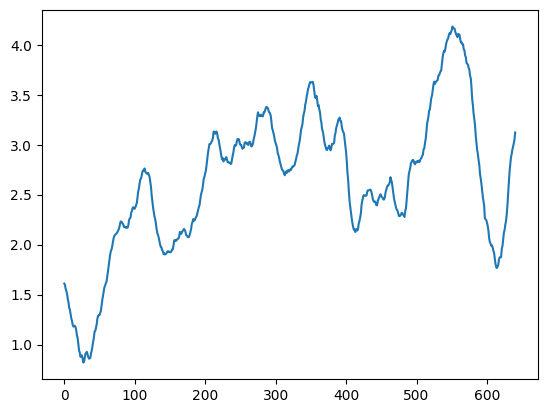

In [114]:
plt.plot(kurt_rolling)

In [115]:
# set trading signal
signal = kurt_rolling
index = [0] * (window + 1)

# set parameters
hold = False
last_days = 5
count = 0
lower_reversal = False
upper_reversal = False
for i in range(2, len(signal)):
    # find long signal
    if not hold:
        if lower_reversal:
            if signal[i-2] < signal[i-1] and signal[i-1] < signal[i]:
                count += 1
                if count == last_days:
                    index.append(1)
                    hold = True
                    count = 0
                else:
                    index.append(-1)
            else:
                # ignore the small reversal
                if count < 2:
                    lower_reversal = False
                index.append(-1)
        # appear lower reversal
        else:
            if signal[i-2] > signal[i-1] and signal[i-1] < signal[i]:
                lower_reversal = True
            index.append(-1)
    # find short signal
    else:
        if upper_reversal:
            if signal[i-2] > signal[i-1] and signal[i-1] > signal[i]:
                count += 1
                if count == last_days:
                    index.append(-1)
                    hold = False
                    count = 0
                else:
                    index.append(1)
            else:
                if count < 2:
                    upper_reversal = False
                index.append(1)
        else:
            if signal[i-2] < signal[i-1] and signal[i-1] > signal[i]:
                upper_reversal = True
            index.append(1)


In [116]:
# # set trading signal
# signal = kurt_rolling
# # signal = rolling_mean(signal, window)

# # lower reversal: + - +
# # upper reversal: - + -
# index = [0] * (window + 1)
# last_days = 3
# count = 0
# lower_reversal = False
# upper_reversal = False
# for i in range(2, len(signal)):
#     if lower_reversal:
#         if signal[i-2] < signal[i-1] and signal[i-1] < signal[i]:
#             count += 1
#             if count == last_days:
#                 index.append(1)
#                 count = 0
#             else:
#                 index.append(0)
#             continue
#         else:
#             lower_reversal = False
#             upper_reversal = True
#             index.append(0)
#             continue
#     elif upper_reversal:
#         if signal[i-2] > signal[i-1] and signal[i-1] > signal[i]:
#             count += 1
#             if count == last_days:
#                 index.append(-1)
#                 count = 0
#             else:
#                 index.append(0)
#             continue
#         else:
#             lower_reversal = True
#             upper_reversal = False
#             index.append(0)
#             continue
#     # appear lower reversal + - +
#     if signal[i-2] > signal[i-1] and signal[i-1] < signal[i]:
#         lower_reversal = True
#     # appear upper reversal - + -
#     elif signal[i-2] < signal[i-1] and signal[i-1] > signal[i]:
#         upper_reversal = True
#     index.append(0)

<StemContainer object of 3 artists>

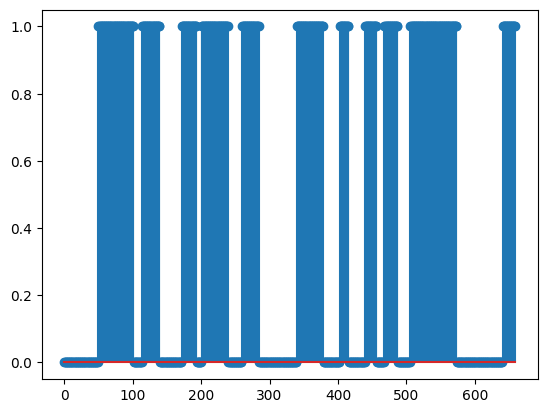

In [117]:
plt.stem(index)

In [118]:
index

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [119]:
# create a dataframe for backtesting
date = data['idt']

# read s&p 500
sp500 = pd.read_csv('sp500_data.csv', index_col='Date')

# Initialize an empty DataFrame to store the results
df = pd.DataFrame(index=date, columns=sp500.columns)
for d in date:
    if d in sp500.index:
        df.loc[d] = sp500.loc[d]
    else:
        df.loc[d, :] = np.nan
df = df.ffill()

# add index
df = df.iloc[:, :-2]
df['Index'] = index

C:\Users\azhe1\AppData\Local\Temp\ipykernel_27300\1664324819.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.ffill()


In [120]:
from datetime import datetime

# set date
date = []
for d in df.index:
    date.append(datetime.strptime(d, '%Y-%m-%d'))

# df.insert(loc=0, column='Date', value=date)
df.reset_index(drop=True, inplace=True)
df.index = date
df.index.name = 'Date'

In [121]:
# store as csv file
df.to_csv('sp500_index.csv')